### 00 Contents

01 Import libraries and data

02 Address PII data

03 Analyse customer behaviour by region

04 Low activity customers

05 Marketing profile

06 Export dataframe and visualisations

### 01 Import libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path

path = r"C:\Users\cathe\OneDrive\Data Analysis\2 4 Instacart Basket Analysis"

In [4]:
# Import data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl')) 

In [5]:
# Check first 5 rows

df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 02 Address PII data

In [10]:
# Remove columns with first name and surname (unique identifier user_id remains)

df_1 = df.drop(columns = ['first_name', 'surname'])

In [12]:
# Check result

df_1.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spend_level,median_days_since_prior_order,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [14]:
# List columns

df_1.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'av_item_spend', 'spend_level', 'median_days_since_prior_order',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

### 03 Analyse customer behaviour by region

In [16]:
# Create region column, populate relevant rows with Northeast

df_1.loc[df_1['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [18]:
# Populate relevant rows of region column with Midwest

df_1.loc[df_1['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [20]:
# Populate relevant rows of region column with South

df_1.loc[df_1['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [22]:
# Populate relevant rows of region column with West

df_1.loc[df_1['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [24]:
# Check result

df_1.sample(10)[['state','region']]

,state,region
20927395,Iowa,Midwest
11132133,Florida,South
19479008,Mississippi,South
26195661,North Dakota,Midwest
14127876,Washington,West
22192362,Kansas,Midwest
9127654,New Jersey,Northeast
32186016,Tennessee,South
24381193,Wisconsin,Midwest
31394886,Mississippi,South


In [26]:
# Create crosstab to analyse spending across regions

crosstab = pd.crosstab(df_1['region'], df_1['spend_level'], dropna = False)

In [28]:
crosstab

spend_level,High spender,Low spender
region,,
Midwest,29294,7567812
Northeast,18642,5703988
South,40738,10750902
West,31286,8261499


In [30]:
# Add percentage of items bought by High spenders column

crosstab['% high spender'] = crosstab['High spender']/(crosstab['High spender']+crosstab['Low spender'])

In [32]:
crosstab

spend_level,High spender,Low spender,% high spender
region,,,
Midwest,29294,7567812,0.003856
Northeast,18642,5703988,0.003258
South,40738,10750902,0.003775
West,31286,8261499,0.003773


Observations:
- There are more items bought in the South than in the other regions.  This is true for high and low spenders
- Low spenders buy the majority of items
- In the Midwest, high spenders buy a greater proportion of the items than in other regions
- In the Northeast, high spenders buy the smallest proportion of items across the four regions

### 04 Low activity customers

In [34]:
# Create low activity flag

df_1.loc[df['max_order'] < 5, 'low_activity'] = 'Low activity'

In [36]:
# Create subset of all low-activity customers

df_low = df_1.loc[df['max_order'] < 5]

In [38]:
# Check output

df_low.shape

(1440251, 32)

In [40]:
# Export low-activity subset

df_low.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.csv'))

In [42]:
# Remove low-activity users from dataframe

df_2 = df_1.loc[df['max_order'] >= 5]

In [44]:
# Export PII-removed dataset

df_1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_noPII.pkl'))

### 05 Marketing profile

Young parent:
- age 40 or younger
- number of dependents at least 1
- department used: babies (department_id 18)

In [46]:
# Identify users who have used department 18

have_used_18 = df_2[df_2['department_id'] == 18]['user_id'].unique()

In [48]:
# Check output

have_used_18

array([    32,     37,     47, ..., 206199, 206207, 206208], dtype=int64)

In [52]:
# Create profile for young parent and put it in new profile column

df_2.loc[(df_2['user_id'].isin(have_used_18)) & (df_2['age'] <= 40) & (df_2['n_dependants'] > 0), 'profile'] = 'Young parent'

In [54]:
# Check output

df_2[df_2['user_id'].isin(have_used_18)][['user_id', 'age', 'n_dependants', 'profile']].sample(20)

,user_id,age,n_dependants,profile
515201,3452,54,2,NaN
17401140,110197,33,1,Young parent
30425550,193476,55,1,NaN
21269947,135239,63,1,NaN
25148703,159780,69,2,NaN
27896597,177443,76,3,NaN
644499,4312,72,2,NaN
27354979,174038,44,3,NaN
15781980,99942,69,2,NaN
26256255,166997,47,2,NaN


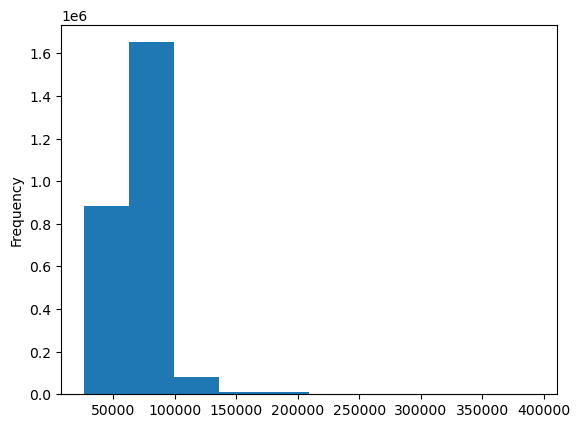

In [80]:
# Histogram showing distribution of income for profile 'Young parent'

hist = df_2.loc[df_2['profile'] == 'Young parent']['income'].plot.hist(bins = 10)

In [74]:
# Find mean, min and max number of orders placed by young parents

df_2.loc[df_2['profile'] == 'Young parent'].agg({'max_order' : ['mean', 'min', 'max']})

,max_order
mean,42.515661
min,5.000000
max,99.000000


In [68]:
# Create new column expenditure

df_2['expenditure'] = df_2.groupby(['user_id'])['prices'].transform(np.sum)

C:\Users\cathe\AppData\Local\Temp\ipykernel_36488\1448527312.py:3: FutureWarning: The provided callable <function sum at 0x000002380146FD80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_2['expenditure'] = df_2.groupby(['user_id'])['prices'].transform(np.sum)
C:\Users\cathe\AppData\Local\Temp\ipykernel_36488\1448527312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['expenditure'] = df_2.groupby(['user_id'])['prices'].transform(np.sum)


In [72]:
# Check output

df_2[['user_id', 'expenditure']].sample(3)

,user_id,expenditure
5917836,37731,9410.9
24747065,157255,10291.0
12193747,77266,2565.9


In [76]:
# Find mean, min and max expenditure of young parents

df_2.loc[df_2['profile'] == 'Young parent'].agg({'expenditure' : ['mean', 'min', 'max']})

,expenditure
mean,4740.329835
min,42.000000
max,22696.900000


### 06 Export dataframe and visualisations

In [82]:
# Export dataframe with PII removed and no low_activity customers

df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_noPII_no_low.pkl'))

In [84]:
# Export histogram of income distribution of young parents

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'youngparent_income_hist.png'))